# Import statements

In [1]:
from IPython.display import display, HTML, Markdown
import murraylab_tools.echo as mt_echo
import os.path
import pandas as pd
from murraylab_tools.echo.echo_functions import echo_round
import os.path
import math
import matplotlib.pyplot as plt

# Input Spreadsheet

In [2]:
# Read the CSV file
df = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\Arul_96w_transfections_changed_concentrations_8_5_2024.csv")
# Define the columns to use
columns_to_use = [
    'plasmid concentration nM', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1', '9.1', '10.1', '11.1', '12.1', '13.1', '14.1',
    '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1', '22.1', '23.1', '24.1', '25.1', '26.1', '27.1', '28.1', '29.1', '30.1', '31.1',
    '32.1'
]

# Filter the DataFrame to include only the specified columns
df = df[columns_to_use]

# Drop rows where 'plasmid concentration nM' is NaN and specific rows by index
df = df[~df["plasmid concentration nM"].isna()]
df = df.drop([0, 1, 12])

# Transpose the DataFrame and reverse the order of columns
df = df.transpose()
df = df[df.columns[::-1]]

# Rename columns based on the first row of the transposed DataFrame
df = df.rename(columns=df.iloc[0])
df = df.drop(index=['plasmid concentration nM'])

df

# Rename specific columns to 'concentration(nM)'
df = df.rename(columns={'pUC19 (maxi)': 'concentration(nM).1', 
                        'm169_GvpW': 'concentration(nM).2',
                        'm168_GvpV': 'concentration(nM).3',
                        'm167_GvpN ': 'concentration(nM).4',
                        'm166_GvpK': 'concentration(nM).5',
                        'm165_GvpJ': 'concentration(nM).6',
                        'm164_GvpG ': 'concentration(nM).7',
                        'm163_GvpF': 'concentration(nM).8',
                        'm162_GvpA': 'concentration(nM).9'})

# List of inserts to add as columns
inserts = ['water', 'puc19', 'm169', 'm168', 'm167', 'm166', 'm165', 'm164', 'm163', 'm162']

# Insert each component column into the DataFrame
for i, insert in enumerate(inserts, start=1):
    df.insert(i * 2 - 1, f'component_{i-1}', insert)

# Reset index and set 'well_id' as index
df = df.reset_index(drop=True).set_index('well_id')

# Drop unnecessary columns
df = df.drop(columns=['component_0', 'Final volume of DNA before water (uL)'])

# Save the DataFrame to a CSV file
df.to_csv(r'C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\Aug_5_2024_association.csv')


In [3]:
pd.read_csv(r'C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\Aug_5_2024_association.csv')

,well_id,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
0,H1,puc19,43.506,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,4.773
1,G1,puc19,40.213,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,6.364
2,F1,puc19,36.920,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,7.955
3,E1,puc19,33.627,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,9.545
4,D1,puc19,30.333,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,11.136
5,C1,puc19,27.040,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,12.727
6,B1,puc19,20.454,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,15.909
7,A1,puc19,54.674,m169,0.000,m168,0.000,m167,0.000,m166,0.000,m165,0.000,m164,0.000,m163,0.000,m162,0.000
8,H2,puc19,42.218,m169,0.199,m168,0.199,m167,0.199,m166,0.199,m165,0.199,m164,0.199,m163,0.199,m162,4.773
9,G2,puc19,38.925,m169,0.199,m168,0.199,m167,0.199,m166,0.199,m165,0.199,m164,0.199,m163,0.199,m162,6.364


# Clear source plate


In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\source_plate.dat", delimiter=' ', header=None)
df = df.iloc[0:0]
df.to_csv(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\source_plate.dat", index=False, header=False)

EmptyDataError: No columns to parse from file

# Output Spreadsheet

In [4]:
#relevent input and output files

stock_file = os.path.join(r'C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\96w_echo_source_sheet_exact_wells.csv')
assoc_pre_file = os.path.join(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\Aug_5_2024_association.csv")
assoc_name = os.path.join(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\outputs\96w_output_file_echo_input.csv")
plate_file  = os.path.join(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\source_plate.dat") 

In [5]:
# make our materials and add them to a source plate using the SourcePlate objects and EchoSourceMaterial objects

# read in the source plate file
source_plate_df = pd.read_csv(stock_file)

#create a source well plate object
source_well_plate = mt_echo.SourcePlate(filename = plate_file, SPtype='384PP_Plus_AQ_BP', SPname="384_source_c1", reuse_wells=True)

# iterate over the source plate file rows and create materials. Then add those materials to a well in the source plate instance.
for index, row in source_plate_df.iterrows():
   source_well_plate.add_material_to_well(well=row.Location, material = mt_echo.EchoSourceMaterial(name=row.Name, concentration=row.Concentration, length=row.Length, units=row.Units), volume=65000)

# create the EchoRun experiment with our source plate instance.
assoc_echo_calculator = mt_echo.EchoRun(DPtype= "Axygen 96", plate=source_well_plate)

# make the materials in the experiment known
for index, row in source_plate_df.iterrows():
   assoc_echo_calculator.add_material(material = mt_echo.EchoSourceMaterial(name=row.Name, concentration=row.Concentration, length=row.Length, units=row.Units))
   if index == 9: # break out of for loop when one copy of materials in the source plate are defined for the experiment
      break


In [6]:
assoc_echo_calculator.rxn_vol = 11000 # PCR is large-volume!

# Define which column of the source file is what
name_col  = 1
conc_col  = 2
len_col   = 3
well_col  = 0
plate_col = 4

In [7]:
# Build a protocol, based on the association file.
assoc_echo_calculator.build_picklist_from_association_spreadsheet(input_filename= assoc_pre_file,
                                                                  well_column= 0,
                                                                  fill_with_water = True,
                                                                  water_name = "water"
                                                                  )


In [8]:
# Write the picklist
assoc_echo_calculator.write_picklist(assoc_name)

c:\Users\ajayg\miniconda3\envs\echo_sandbox\lib\site-packages\murraylab_tools\echo\echo_functions.py:184: UserWarning: Requesting 0 volume from material m169 into well A1; are you sure you want to do this?
  warnings.warn(f"Requesting 0 volume from material {self.name}"
c:\Users\ajayg\miniconda3\envs\echo_sandbox\lib\site-packages\murraylab_tools\echo\echo_functions.py:184: UserWarning: Requesting 0 volume from material m168 into well A1; are you sure you want to do this?
  warnings.warn(f"Requesting 0 volume from material {self.name}"
c:\Users\ajayg\miniconda3\envs\echo_sandbox\lib\site-packages\murraylab_tools\echo\echo_functions.py:184: UserWarning: Requesting 0 volume from material m167 into well A1; are you sure you want to do this?
  warnings.warn(f"Requesting 0 volume from material {self.name}"
c:\Users\ajayg\miniconda3\envs\echo_sandbox\lib\site-packages\murraylab_tools\echo\echo_functions.py:184: UserWarning: Requesting 0 volume from material m166 into well A1; are you sure yo

Trouble Shoot

In [9]:
material_well_dict = {}
for mat_name in assoc_echo_calculator.material_dict:
    mat = assoc_echo_calculator.material_dict[mat_name]
    if mat:
        name, conc = mat.name, mat.concentration
        if mat.plate is None:
            raise Exception(f"Material '{mat}' doesn't have a plate " +\
                                "at plate initialization time.")
        print("Matieral name: " + mat.name)
        print("Material source concentration: " + str(mat.concentration))
        #print(mat.plate)
        echo_volume = mat.echo_volume_requested
        tot_available_vol = mat.plate.get_available_material(mat)
        volume_additional = echo_volume-tot_available_vol
        print("How much volue needed for run: " + str(echo_volume))
        n_source_wells = math.ceil(float(volume_additional) /  44000)
        print("Number of source wells needed additional: " + str(n_source_wells))
        print("Number of source wells needed: " + str(math.ceil(float(echo_volume) /  44000)))
        #wells_to_fill = mat.plate.request_source_wells(mat)
        
        

        # material_well_dict[(name, conc)] = wells_to_fill

        # if (name, conc) in mat.plate.materials_to_add:
        #     material_well_dict[(name, conc)] += \
        #                             mat.plate.materials_to_add[name, conc]

assoc_echo_calculator.material_dict['m163'].concentration

Matieral name: m162
Material source concentration: 104.51
How much volue needed for run: 31300
Number of source wells needed additional: 1
Number of source wells needed: 1
Matieral name: m163
Material source concentration: 15.67
How much volue needed for run: 8450
Number of source wells needed additional: 0
Number of source wells needed: 1
Matieral name: m164
Material source concentration: 14.55
How much volue needed for run: 9075
Number of source wells needed additional: 0
Number of source wells needed: 1
Matieral name: m165
Material source concentration: 14.98
How much volue needed for run: 8850
Number of source wells needed additional: 0
Number of source wells needed: 1
Matieral name: m166
Material source concentration: 14.29
How much volue needed for run: 9075
Number of source wells needed additional: 0
Number of source wells needed: 1
Matieral name: m167
Material source concentration: 15.51
How much volue needed for run: 8675
Number of source wells needed additional: 0
Number of s

15.67

# Checker

In [10]:
import pandas as pd

final_association = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\Aug_5_2024_association.csv")
output_association = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\outputs\96w_output_file_echo_input.csv_EchoInput.csv")


display(final_association.head())
display(output_association.head())

,well_id,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
0,H1,puc19,43.506,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,4.773
1,G1,puc19,40.213,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,6.364
2,F1,puc19,36.920,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,7.955
3,E1,puc19,33.627,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,9.545
4,D1,puc19,30.333,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,11.136


,Source Plate,Source Plate Type,Source Well,Sample ID,Destination Plate Name,Destination Well,Transfer Volume,Sample Comment
0,384_source_c1,384PP_Plus_AQ_BP,A1,m162,Axygen 96,H1,500,Actual concentration: 4.75
1,384_source_c1,384PP_Plus_AQ_BP,A1,m162,Axygen 96,G1,675,Actual concentration: 6.41
2,384_source_c1,384PP_Plus_AQ_BP,A1,m162,Axygen 96,F1,825,Actual concentration: 7.84
3,384_source_c1,384PP_Plus_AQ_BP,A1,m162,Axygen 96,E1,1000,Actual concentration: 9.50
4,384_source_c1,384PP_Plus_AQ_BP,A1,m162,Axygen 96,D1,1175,Actual concentration: 11.16


In [11]:
# make a copy of the association dataframe
df = final_association.copy()

# dictionary to define stock concentrations in nM of source wells
stock_dict = {}
for mat_name in assoc_echo_calculator.material_dict:
    mat = assoc_echo_calculator.material_dict[mat_name]
    stock_dict[mat.name] = mat.concentration

stock_dict.pop('water')





# dictionary for mapping plasmid names to association sheet columns
component_mapping = {

'm162' :	('component_9', 'concentration(nM).9'),
'm163' :	('component_8', 'concentration(nM).8'),
'm164' :	('component_7', 'concentration(nM).7'),
'm165' :	('component_6', 'concentration(nM).6'),
'm166' :	('component_5', 'concentration(nM).5'),
'm167' :	('component_4', 'concentration(nM).4'),
'm168' :	('component_3', 'concentration(nM).3'),
'm169' :	('component_2', 'concentration(nM).2'),
'puc19' :	('component_1', 'concentration(nM).1'),

}

# convert the association spreadsheet concentrations to volumes
for index, row in df.iterrows():
    for i in [1,3,5,7,9,11,13,15,17]:
        df.iloc[index,i+1] = (11*df.iloc[index,i+1])/(stock_dict[row[i]]) * 1000

# make a dataframe for populating the echo_output volumes
df2 = final_association.copy()
df2 = df2.set_index('well_id')

# make a dataframe copy of the echo output sheet
df_echo = output_association.copy()


# populate df2 with the volumes the echo will actually transfer
for well_id in df2.index:
    for key in stock_dict:
        summed_volume = sum(df_echo[(df_echo['Destination Well'] == well_id) & (df_echo['Sample ID'] == key)]['Transfer Volume'])

        df2.loc[well_id, component_mapping[key][1]] = summed_volume


# calculate percent error by comparing dataframes

df = df.set_index('well_id')

assert list(df.columns) == list(df2.columns)

string_columns = df2.select_dtypes(include='object').columns
float_columns = df2.select_dtypes(include='float').columns

df2[float_columns] = df2[float_columns].replace(0, pd.NA)

result_df = df2.copy()
result_df[float_columns] = ((df2[float_columns] - df[float_columns])  / df2[float_columns] * 100).abs()


# Add string columns to the result DataFrame
result_df[string_columns] = df2[string_columns]

#display(df.loc['H9', : ])

#display(df2.loc['H9', : ])

result_df.head()


C:\Users\ajayg\AppData\Local\Temp\ipykernel_20984\4044905214.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[index,i+1] = (11*df.iloc[index,i+1])/(stock_dict[row[i]]) * 1000
C:\Users\ajayg\AppData\Local\Temp\ipykernel_20984\4044905214.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[index,i+1] = (11*df.iloc[index,i+1])/(stock_dict[row[i]]) * 1000
C:\Users\ajayg\AppData\Local\Temp\ipykernel_20984\4044905214.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,
H1,puc19,0.218457,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.474596
G1,puc19,0.117014,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.765831
F1,puc19,0.202730,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,1.489491
E1,puc19,0.200389,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.46407
D1,puc19,0.183456,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.246948


In [12]:
display(result_df[(result_df['concentration(nM).1'] > 5)])
display(result_df[(result_df['concentration(nM).2'] > 5)])
display(result_df[(result_df['concentration(nM).3'] > 5)])
display(result_df[(result_df['concentration(nM).4'] > 5)])
display(result_df[(result_df['concentration(nM).5'] > 5)])
display(result_df[(result_df['concentration(nM).6'] > 5)])
display(result_df[(result_df['concentration(nM).7'] > 5)])
display(result_df[(result_df['concentration(nM).8'] > 5)])
display(result_df[(result_df['concentration(nM).9'] > 5)])

,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,
H1,puc19,0.218457,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.474596
G1,puc19,0.117014,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.765831
F1,puc19,0.202730,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,1.489491
E1,puc19,0.200389,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.46407
D1,puc19,0.183456,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.246948
C1,puc19,0.320923,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.773628
B1,puc19,0.524641,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.031562
H2,puc19,0.146641,m169,7.048832,m168,0.228938,m167,5.910165,m166,2.122697,m165,2.581219,m164,0.297824,m163,6.870879,m162,0.474596
G2,puc19,0.206592,m169,7.048832,m168,0.228938,m167,5.910165,m166,2.122697,m165,2.581219,m164,0.297824,m163,6.870879,m162,0.765831


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,
H1,puc19,0.218457,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.474596
G1,puc19,0.117014,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.765831
F1,puc19,0.202730,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,1.489491
E1,puc19,0.200389,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.46407
D1,puc19,0.183456,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.246948
C1,puc19,0.320923,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.773628
B1,puc19,0.524641,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.031562
H2,puc19,0.146641,m169,7.048832,m168,0.228938,m167,5.910165,m166,2.122697,m165,2.581219,m164,0.297824,m163,6.870879,m162,0.474596
G2,puc19,0.206592,m169,7.048832,m168,0.228938,m167,5.910165,m166,2.122697,m165,2.581219,m164,0.297824,m163,6.870879,m162,0.765831


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,
H1,puc19,0.218457,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.474596
G1,puc19,0.117014,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.765831
F1,puc19,0.202730,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,1.489491
E1,puc19,0.200389,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.46407
D1,puc19,0.183456,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.246948
C1,puc19,0.320923,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.773628
B1,puc19,0.524641,m169,7.515924,m168,0.274725,m167,6.382979,m166,1.609517,m165,3.070761,m164,0.206186,m163,7.338864,m162,0.031562
H2,puc19,0.146641,m169,7.048832,m168,0.228938,m167,5.910165,m166,2.122697,m165,2.581219,m164,0.297824,m163,6.870879,m162,0.474596
G2,puc19,0.206592,m169,7.048832,m168,0.228938,m167,5.910165,m166,2.122697,m165,2.581219,m164,0.297824,m163,6.870879,m162,0.765831


,component_1,concentration(nM).1,component_2,concentration(nM).2,component_3,concentration(nM).3,component_4,concentration(nM).4,component_5,concentration(nM).5,component_6,concentration(nM).6,component_7,concentration(nM).7,component_8,concentration(nM).8,component_9,concentration(nM).9
well_id,,,,,,,,,,,,,,,,,,


<Figure size 640x480 with 0 Axes>

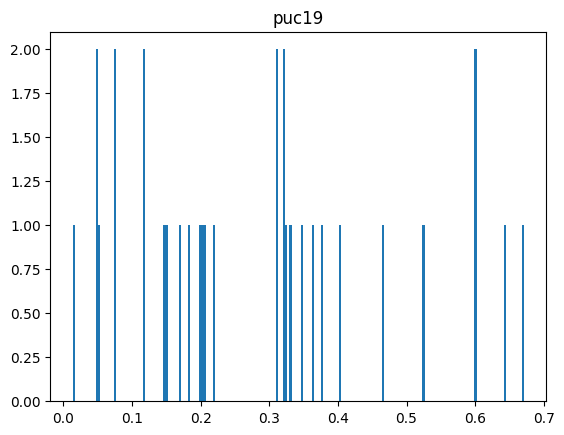

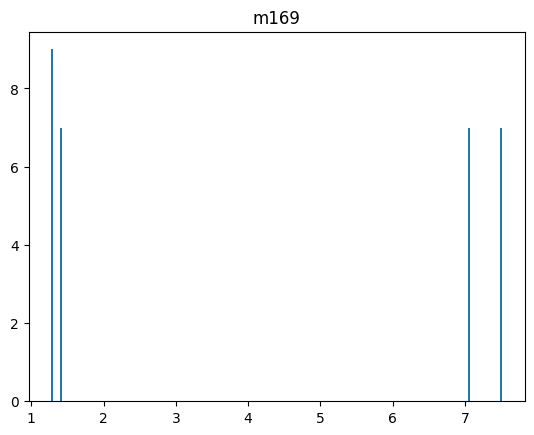

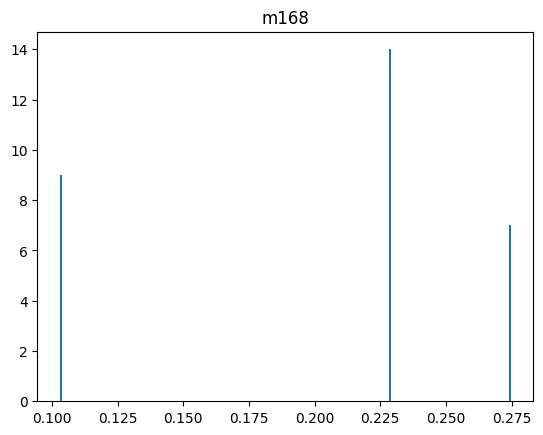

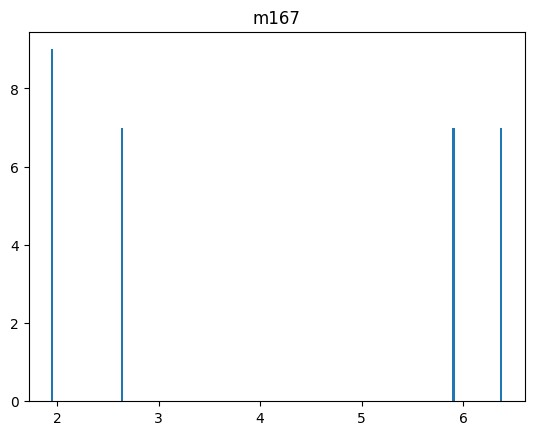

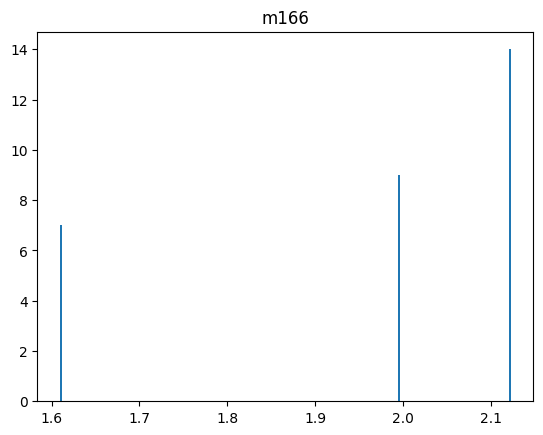

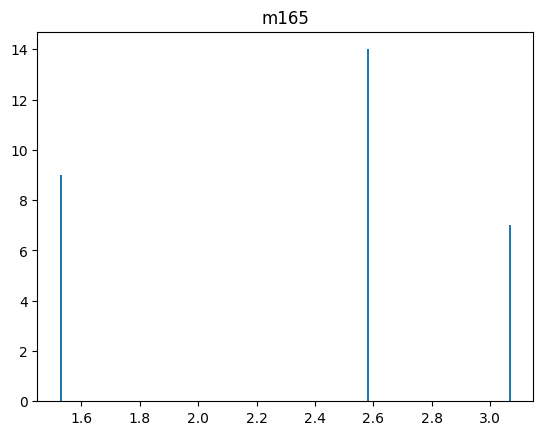

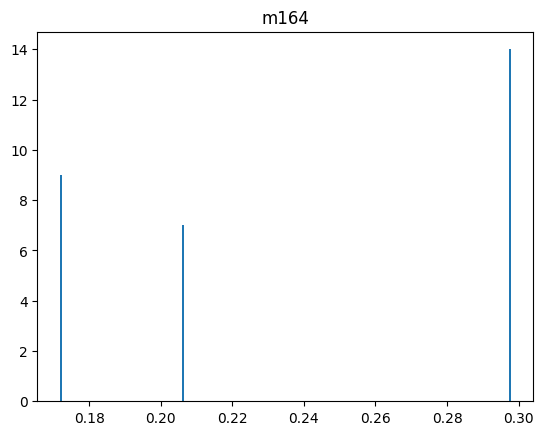

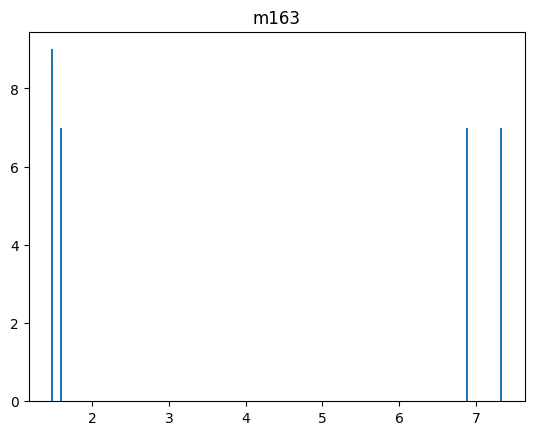

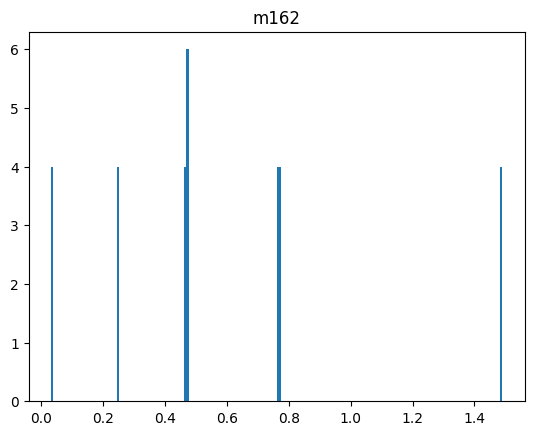

<Figure size 640x480 with 0 Axes>

In [13]:
plt.hist(result_df['concentration(nM).1'].dropna(), bins=200)
plt.title("puc19")
plt.figure()
plt.hist(result_df['concentration(nM).2'].dropna(), bins=200)
plt.title("m169")
plt.figure()
plt.hist(result_df['concentration(nM).3'].dropna(), bins=200)
plt.title("m168")
plt.figure()
plt.hist(result_df['concentration(nM).4'].dropna(), bins=200)
plt.title("m167")
plt.figure()
plt.hist(result_df['concentration(nM).5'].dropna(), bins=200)
plt.title("m166")
plt.figure()
plt.hist(result_df['concentration(nM).6'].dropna(), bins=200)
plt.title("m165")
plt.figure()
plt.hist(result_df['concentration(nM).7'].dropna(), bins=200)
plt.title("m164")
plt.figure()
plt.hist(result_df['concentration(nM).8'].dropna(), bins=200)
plt.title("m163")
plt.figure()
plt.hist(result_df['concentration(nM).9'].dropna(), bins=200)
plt.title("m162")
plt.figure()

In [14]:
pd.read_csv(planned_nM_path)

NameError: name 'planned_nM_path' is not defined

C:\Users\ajayg\AppData\Local\Temp\ipykernel_21372\671766366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_echo_df['Transfer Volume'] = filtered_echo_df['Destination Well'].map(volume_mapping)


,Sample_ID,well_id,H2O
1.1,water,H1,5872.0
2.1,water,G1,6016.0
3.1,water,F1,6160.0
4.1,water,E1,6304.0
5.1,water,D1,6448.0
6.1,water,C1,6592.0
7.1,water,B1,6881.0
8.1,water,A1,5828.0
9.1,water,H2,5484.0
10.1,water,G2,5628.0


,Sample_ID,well_id,H2O
274,water,H1,5850
275,water,G1,6000
276,water,F1,6150
277,water,E1,6300
278,water,D1,6425
279,water,C1,6575
280,water,B1,6875
282,water,A1,5825
283,water,H2,5450
284,water,G2,5600


,Sample_ID,well_id,Percent_Error
0,5872.0,H1,0.374659
1,6016.0,G1,0.265957
2,6160.0,F1,0.162338
3,6304.0,E1,0.063452
4,6448.0,D1,0.356700
5,6592.0,C1,0.257888
6,6881.0,B1,0.087197
7,5828.0,A1,0.051476
8,5484.0,H2,0.619985
9,5628.0,G2,0.497512


(array([1., 0., 2., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 

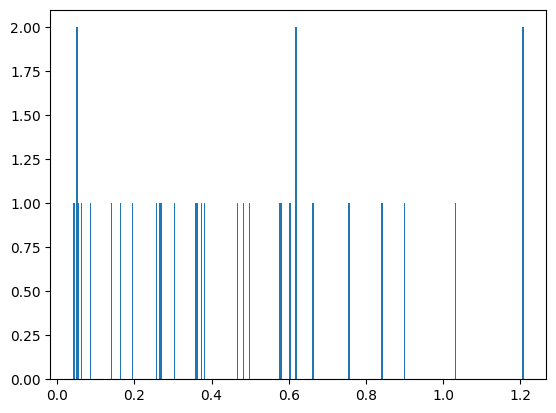

In [ ]:
import pandas as pd

# File paths
echo_path = r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\outputs\96w_output_file_echo_input.csv_EchoInput.csv"
planned_nM_path = r"C:\Users\ajayg\murraylab_tools\examples\Aug_5_2024_AG\inputs\Arul_96w_transfections_changed_concentrations_8_5_2024.csv"

# Load data from CSV files
echo_sheet = pd.read_csv(echo_path)
planned_nM_df = pd.read_csv(planned_nM_path)

# Extract and filter relevant information from the Echo sheet
water_samples = echo_sheet[echo_sheet['Sample ID'] == 'water']
columns_to_keep = ['Sample ID', 'Destination Well', 'Transfer Volume']
filtered_echo_df = water_samples[columns_to_keep]

# Group by 'Destination Well' and sum the 'Transfer Volume'
transfer_volume_sum = filtered_echo_df.groupby('Destination Well').agg({
    'Transfer Volume': 'sum'
}).reset_index()

# Map the summed transfer volumes back to the original DataFrame
volume_mapping = transfer_volume_sum.set_index('Destination Well')['Transfer Volume'].to_dict()
filtered_echo_df['Transfer Volume'] = filtered_echo_df['Destination Well'].map(volume_mapping)

# Remove duplicate rows if necessary
filtered_echo_df = filtered_echo_df.drop_duplicates()

# Define columns to use for the planned nM DataFrame
# Include 'plasmid concentration nM' and wells from 1.1 to 96.1
columns_to_use = ['plasmid concentration nM'] + [f'{i}.1' for i in range(1, 33)]
planned_nM_df = planned_nM_df[columns_to_use]

# Transpose the planned nM DataFrame
planned_nM_df = planned_nM_df.transpose()

# Rename columns using the first row and drop that row
planned_nM_df = planned_nM_df.rename(columns=planned_nM_df.iloc[0])
planned_nM_df = planned_nM_df.drop(index=['plasmid concentration nM'])

# Create a new DataFrame for water volumes
water_df = planned_nM_df[['H2O', 'well_id']]
water_df = water_df[water_df.columns[::-1]]  # Reverse column order
water_df.insert(0, "Sample_ID", ["water"] * 32)

# Convert H2O column to float and multiply by 1000
water_df['H2O'] = water_df['H2O'].astype(float) * 1000

# Transpose the water DataFrame for final output
# water_df = water_df.transpose()
# filtered_echo_df = filtered_echo_df.transpose()

# Rename columns to match names
column_rename_map = {
    'Sample ID': 'Sample_ID',
    'Destination Well' : 'well_id',
    'Transfer Volume' : 'H2O'
}
filtered_echo_df = filtered_echo_df.rename(columns=column_rename_map)

# Display results
display(water_df)
display(filtered_echo_df)

# Ensure both DataFrames have the well_id as the index
water_df = water_df.set_index('well_id')
filtered_echo_df = filtered_echo_df.set_index('well_id')

# Ensure Sample_ID is a float
water_df['Sample_ID'] = water_df['H2O'].astype(float)
filtered_echo_df['Sample_ID'] = filtered_echo_df['H2O'].astype(float)

# Replace 0 with NaN in filtered_echo_df to avoid division by zero errors
filtered_echo_df = filtered_echo_df.replace(0, pd.NA)

# Ensure H2O values are floats
water_df['H2O'] = water_df['H2O'].astype(float)
filtered_echo_df['H2O'] = filtered_echo_df['H2O'].astype(float)

# Calculate the percent error
percent_error = (abs((water_df['H2O'] - filtered_echo_df['H2O']) / water_df['H2O']) * 100).astype(float)

# Create a new DataFrame with Sample_ID, well_id, and percent error
result_df = pd.DataFrame({
    'Sample_ID': water_df['Sample_ID'],
    'well_id': water_df.index,
    'Percent_Error': percent_error
})

# Reset the index to move well_id back to a column
result_df = result_df.reset_index(drop=True)

# Ensure all numerical columns are floats
result_df['Sample_ID'] = result_df['Sample_ID'].astype(float)
result_df['Percent_Error'] = result_df['Percent_Error'].astype(float)

# Display the new DataFrame
display(result_df)

plt.hist(result_df['Percent_Error'].dropna(), bins=300)

In [ ]:
type(df2['concentration(nM).1'][0])

KeyError: 'concentration(nM).1'

# Manually Making Output Spreadsheet

In [ ]:
#output spreadsheet

import pandas as pd

# Number of rows in the initial DataFrame
num_rows = 873

# Define headers and values
header = ['Source Plate', 'Source Plate Type', 'Source Well', 'Sample ID', 'Destination Plate Name']
column1_value = 'name1'
column2_value = 'name2'
column5_value = 'name5'

# Define unique names for columns
unique_names_col3 = ['A1'] * 97 + ['C3'] * (num_rows - 97)
unique_names_col4 = ['Water'] * 97 + ['Plasmid'] * (num_rows - 97)

# Create the initial DataFrame
df = pd.DataFrame({
    header[0]: [column1_value] * num_rows,
    header[1]: [column2_value] * num_rows,
    header[2]: unique_names_col3,
    header[3]: unique_names_col4,
    header[4]: [column5_value] * num_rows,
})

additional_file_path = (r"C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\96w_final_association_spreadsheet.csv")
new_file = pd.read_csv(additional_file_path)

column_to_extend = 'well_id'

if column_to_extend in new_file.columns:
    extended_column = pd.concat([new_file[column_to_extend]] * 8, ignore_index=True)
        
    df[additional_file_path] = extended_column

columns_to_combine = ['concentration(nM)']

combined_column = pd.concat([new_file[col] for col in columns_to_combine], ignore_index=True)

df['Volume'] = combined_column

df

,Source Plate,Source Plate Type,Source Well,Sample ID,Destination Plate Name,C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\96w_final_association_spreadsheet.csv,Volume
0,name1,name2,A1,Water,name5,H1,43.51
1,name1,name2,A1,Water,name5,G1,40.21
2,name1,name2,A1,Water,name5,F1,36.92
3,name1,name2,A1,Water,name5,E1,33.63
4,name1,name2,A1,Water,name5,D1,30.33
...,...,...,...,...,...,...,...
868,name1,name2,C3,Plasmid,name5,NaN,NaN
869,name1,name2,C3,Plasmid,name5,NaN,NaN
870,name1,name2,C3,Plasmid,name5,NaN,NaN
871,name1,name2,C3,Plasmid,name5,NaN,NaN


# Graveyard

In [ ]:
# Define the source plate based on the stock file. Not used if we make the association spreadsheet by hand
assoc_echo_calculator.load_source_plate(input_filename=stock_file, name_col= name_col, conc_col= conc_col,
                                     len_col= len_col, well_col= well_col, units_col= plate_col)

In [19]:
# rxn_vol = 12000

material_well_dict = {}
for mat_name in assoc_echo_calculator.material_dict:
    mat = assoc_echo_calculator.material_dict[mat_name]
    if mat:
        name, conc = mat.name, mat.concentration
        if mat.plate is None:
            raise Exception(f"Material '{mat}' doesn't have a plate " +\
                                "at plate initialization time.")
        print(mat.name)
        print(mat.plate)
        echo_volume = mat.echo_volume_requested
        print(echo_volume)
        tot_available_vol = mat.plate.get_available_material(mat)
        volume_additional = echo_volume-tot_available_vol
        print(volume_additional)
        n_source_wells = math.ceil(float(volume_additional) /  44000)
        print(n_source_wells)
        wells_to_fill = mat.plate.request_source_wells(mat)
        
        

        material_well_dict[(name, conc)] = wells_to_fill

        if (name, conc) in mat.plate.materials_to_add:
            material_well_dict[(name, conc)] += \
                                    mat.plate.materials_to_add[name, conc]


m162
102500
73000
2
m163
35525
27050
1
m164
32800
21600
1
m165
35850
27700
1
m166
34200
24400
1
m167
36350
28700
1
m168
32800
21600
1
m169
35525
27050
1
puc19
241350
218700
5
water
469100
454200
11


In [ ]:
 math.ceil(float(-4000) /  44000)

0

In [ ]:
import numpy as np
np.empty(shape=(1,), dtype=object)

array([None], dtype=object)

In [ ]:
def request_source_wells(self, material):
        """
        Returns the wells to fill with the given material as a list
        [(well, volume)]
        """
        #Material name and concentration
        name, conc = material.name, material.concentration
        #usable volume in a source well
        usable_volume  = max_volume - dead_volume
        #Total echo volume requested
        echo_volume = material.echo_volume_requested

        #Available material:
        tot_available_vol = self.get_available_material(material)
        #new material needed:
        volume_additional = echo_volume-tot_available_vol
        #Number of new source wells needed
        n_source_wells = math.ceil(float(volume_additional) /  usable_volume)

        #Fill Wells here
        wells_to_fill_list = self.request_wells(int(n_source_wells))
        wells_to_fill = []
        date = pydate.today().strftime("%d/%m/%Y")
        well_ind = 0

        while tot_available_vol < echo_volume:
            well = wells_to_fill_list[well_ind]
            if tot_available_vol+usable_volume >= echo_volume:
                fill_volume = echo_volume - tot_available_vol

                wells_to_fill += [(well, dead_volume+fill_volume)]

                tot_available_vol=echo_volume
                if (name, conc) in self.materials:
                    self.materials[name, conc] += \
                                    [(well, dead_volume+fill_volume, date)]
                else:
                    self.materials[name, conc] = \
                                        [(well, dead_volume+fill_volume, date)]
                self.wells_used[well] = (name, conc,
                                         dead_volume+fill_volume, date)
            elif tot_available_vol + usable_volume < echo_volume:

                wells_to_fill += [(well, max_volume)]

                tot_available_vol += usable_volume
                if (name, conc) in self.materials:
                    self.materials[name, conc] += [(well, max_volume, date)]
                else:
                    self.materials[name, conc] = [(well, max_volume, date)]
                self.wells_used[well] = (name, conc, max_volume, date)
            well_ind += 1
            material.total_volume_requested += dead_volume

        return wells_to_fill


In [ ]:
assoc_echo_calculator.material_dict.get('m162').plate.request_source_wells()

{('m162', 6.917542889): [('A1', 65000, '31/07/2024')],
 ('m163', 7.534091765): [('C1', 65000, '31/07/2024')],
 ('m164', 8.103990405): [('E1', 65000, '31/07/2024')],
 ('m165', 7.520832707): [('G1', 65000, '31/07/2024')],
 ('m166', 7.954816641): [('I1', 65000, '31/07/2024')],
 ('m167', 7.369522602): [('K1', 65000, '31/07/2024')],
 ('m168', 8.143455105): [('M1', 65000, '31/07/2024')],
 ('m169', 7.619163721): [('O1', 65000, '31/07/2024')],
 ('puc19', 116.2724096): [('B2', 65000, '31/07/2024')],
 ('water', 1.0): [('P24', 65000, '31/07/2024')]}

In [ ]:
assoc_echo_calculator.plates[0].materials

{('m162', 6.917542889): [('A1', 65000, '31/07/2024')],
 ('m163', 7.534091765): [('C1', 65000, '31/07/2024')],
 ('m164', 8.103990405): [('E1', 65000, '31/07/2024')],
 ('m165', 7.520832707): [('G1', 65000, '31/07/2024')],
 ('m166', 7.954816641): [('I1', 65000, '31/07/2024')],
 ('m167', 7.369522602): [('K1', 65000, '31/07/2024')],
 ('m168', 8.143455105): [('M1', 65000, '31/07/2024')],
 ('m169', 7.619163721): [('O1', 65000, '31/07/2024')],
 ('puc19', 116.2724096): [('B2', 65000, '31/07/2024')],
 ('water', 1.0): [('P24', 65000, '31/07/2024')]}

In [ ]:
#output spreadsheet

import pandas as pd

# Number of rows in the initial DataFrame
num_rows = 873

# Define headers and values
header = ['Source Plate', 'Source Plate Type', 'Source Well', 'Sample ID', 'Destination Plate Name']
column1_value = 'name1'
column2_value = 'name2'
column5_value = 'name5'

# Define unique names for columns
unique_names_col3 = ['A1'] * 97 + ['C3'] * (num_rows - 97)
unique_names_col4 = ['Water'] * 97 + ['Plasmid'] * (num_rows - 97)

# Create the initial DataFrame
df = pd.DataFrame({
    header[0]: [column1_value] * num_rows,
    header[1]: [column2_value] * num_rows,
    header[2]: unique_names_col3,
    header[3]: unique_names_col4,
    header[4]: [column5_value] * num_rows,
})

additional_file_path = (r"C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\96w_final_association_spreadsheet.csv")
new_file = pd.read_csv(additional_file_path)

column_to_extend = 'well_id'

if column_to_extend in new_file.columns:
    extended_column = pd.concat([new_file[column_to_extend]] * 8, ignore_index=True)
        
    df[additional_file_path] = extended_column

columns_to_combine = ['component_3']

combined_column = pd.concat([new_file[col] for col in columns_to_combine], ignore_index=True)

df['Volume'] = combined_column

df

,Source Plate,Source Plate Type,Source Well,Sample ID,Destination Plate Name,C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\96w_final_association_spreadsheet.csv,Volume
0,name1,name2,A1,Water,name5,H1,m169
1,name1,name2,A1,Water,name5,G1,m169
2,name1,name2,A1,Water,name5,F1,m169
3,name1,name2,A1,Water,name5,E1,m169
4,name1,name2,A1,Water,name5,D1,m169
...,...,...,...,...,...,...,...
868,name1,name2,C3,Plasmid,name5,NaN,NaN
869,name1,name2,C3,Plasmid,name5,NaN,NaN
870,name1,name2,C3,Plasmid,name5,NaN,NaN
871,name1,name2,C3,Plasmid,name5,NaN,NaN


In [ ]:
plate_log_folder = os.path.join(r"C:\Users\ajayg\murraylab_tools\examples\arul_example\outputs\source[1].txt"))

In [ ]:
assoc_echo_calculator.initialize_source_plate()

{('m162', 6.917542889): [('A19', 48000)],
 ('m163', 7.534091765): [('A21', 21775)],
 ('m164', 8.103990405): [('A23', 21725)],
 ('m165', 7.520832707): [('B01', 21775)],
 ('m166', 7.954816641): [('B03', 21725)],
 ('m167', 7.369522602): [('B05', 21800)],
 ('m168', 8.143455105): [('B07', 21725)],
 ('m169', 7.619163721): [('B09', 21775)],
 ('puc19', 116.2724096): [('B11', 30825)],
 ('water', 1.0): []}

In [ ]:
import murraylab_tools.echo as mt_echo
import os.path
import pandas as pd
df = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\Arul_96w_transfections_planned_nM.csv")
columns_to_use = [
    'plasmid concentration nM', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1', '9.1', '10.1', '11.1', '12.1', '13.1', '14.1',
    '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1', '22.1', '23.1', '24.1', '25.1', '26.1', '27.1', '28.1', '29.1', '30.1', '31.1',
    '32.1', '33.1', '34.1', '35.1', '36.1', '37.1', '38.1', '39.1', '40.1', '41.1', '42.1', '43.1', '44.1', '45.1', '46.1', '47.1', '48.1', '49.1',
    '50.1', '51.1', '52.1', '53.1', '54.1', '55.1', '56.1', '57.1', '58.1', '59.1', '60.1', '61.1', '62.1', '63.1', '64.1', '65.1', '66.1', '67.1',
    '68.1', '69.1', '70.1', '71.1', '72.1', '73.1', '74.1', '75.1', '76.1', '77.1', '78.1', '79.1', '80.1', '81.1', '82.1', '83.1', '84.1', '85.1',
    '86.1', '87.1', '88.1', '89.1', '90.1', '91.1', '92.1', '93.1', '94.1', '95.1', '96.1'
]

df = df[columns_to_use]
df = df[~df["plasmid concentration nM"].isna()]
df = df.drop([0, 1, 12])
df = df.transpose()
df = df[df.columns[::-1]]

df = df.rename(columns=df.iloc[0])
df = df.drop(index=['plasmid concentration nM'])

df = df.rename(columns={'puc19':'concentration(nM)', 
                        'm169_GvpW':'concentration(nM)',
                        'm168_GvpV':'concentration(nM)',
                        'm167_GvpN ':'concentration(nM)',
                        'm166_GvpK':'concentration(nM)',
                        'm165_GvpJ':'concentration(nM)',
                        'm164_GvpG':'concentration(nM)',
                        'm163_GvpF':'concentration(nM)',
                        'm162_GvpA':'concentration(nM)'})

inserts = ['water', 'puc19', 'm169', 'm168', 'm167', 'm166', 'm165', 'm164', 'm163', 'm162']

for i, insert in enumerate(inserts, start=1):
    df.insert(i * 2 - 1, f'component_{i}', insert)

df = df.reset_index(drop=True).set_index('well_id')

df
#df = df.drop(columns=['component_1','Final volume of DNA before water (uL)'])



,component_1,Final volume of DNA before water (uL),component_2,pUC19 (maxi),component_3,concentration(nM),component_4,concentration(nM),component_5,concentration(nM),component_6,concentration(nM),component_7,concentration(nM),component_8,m164_GvpG,component_9,concentration(nM),component_10,concentration(nM)
well_id,,,,,,,,,,,,,,,,,,,,
H1,water,5.103,puc19,43.506,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,4.77
G1,water,4.955,puc19,40.213,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,6.36
F1,water,4.806,puc19,36.92,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,7.95
E1,water,4.658,puc19,33.627,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,9.55
D1,water,4.51,puc19,30.333,m169,0.099,m168,0.099,m167,0.099,m166,0.099,m165,0.099,m164,0.099,m163,0.099,m162,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E12,water,10.25,puc19,14.309,m169,1.591,m168,1.591,m167,1.591,m166,1.591,m165,1.591,m164,1.591,m163,1.591,m162,9.55
D12,water,10.101,puc19,11.015,m169,1.591,m168,1.591,m167,1.591,m166,1.591,m165,1.591,m164,1.591,m163,1.591,m162,11.14
C12,water,9.953,puc19,7.722,m169,1.591,m168,1.591,m167,1.591,m166,1.591,m165,1.591,m164,1.591,m163,1.591,m162,12.73


In [ ]:
import pandas as pd

#import the spreadsheet needed
echo_sheet = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\arul_example\outputs\96w_output_file_echo_input.csv_EchoInput.csv")
df = pd.read_csv(r"C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\Arul_96w_transfections_planned_nM_2d.csv")

#extracting and keeping only the columns we need from the echo_sheet csv file
extracted_rows = echo_sheet[echo_sheet['Sample ID'] == 'water']
columns_to_keep = ['Sample ID', 'Destination Well', 'Transfer Volume']
filtered_df = extracted_rows[columns_to_keep]


# Define the columns to use for the original association file
columns_to_use = [
    'plasmid concentration nM', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1', '9.1', '10.1', '11.1', '12.1', '13.1', '14.1',
    '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1', '22.1', '23.1', '24.1', '25.1', '26.1', '27.1', '28.1', '29.1', '30.1', '31.1',
    '32.1', '33.1', '34.1', '35.1', '36.1', '37.1', '38.1', '39.1', '40.1', '41.1', '42.1', '43.1', '44.1', '45.1', '46.1', '47.1', '48.1', '49.1',
    '50.1', '51.1', '52.1', '53.1', '54.1', '55.1', '56.1', '57.1', '58.1', '59.1', '60.1', '61.1', '62.1', '63.1', '64.1', '65.1', '66.1', '67.1',
    '68.1', '69.1', '70.1', '71.1', '72.1', '73.1', '74.1', '75.1', '76.1', '77.1', '78.1', '79.1', '80.1', '81.1', '82.1', '83.1', '84.1', '85.1',
    '86.1', '87.1', '88.1', '89.1', '90.1', '91.1', '92.1', '93.1', '94.1', '95.1', '96.1'
]
df = df[columns_to_use]

#transpose the file
df = df.transpose()

#remive the first row and reset the index
df = df.rename(columns=df.iloc[0])
df = df.drop(index=['plasmid concentration nM'])

keep = ['H2O', 'well_id']
new_df = df[keep]

new_df = new_df[new_df.columns[::-1]]
new_df.insert(0, "Sample_ID", ["water"] * 96)

new_df['H2O'] = new_df['H2O'].astype(float)
new_df['H2O'] = new_df['H2O'] * 10000

new_df = new_df.transpose()
filtered_df = filtered_df.transpose()

display(new_df)
display(filtered_df)

In [ ]:
import pandas as pd

# File paths
echo_path = r"C:\Users\ajayg\murraylab_tools\examples\arul_example\outputs\96w_output_file_echo_input.csv_EchoInput.csv"
planned_nM_path = r"C:\Users\ajayg\murraylab_tools\examples\arul_example\inputs\Arul_96w_transfections_planned_nM_2d.csv"

# Load data from CSV files
echo_sheet = pd.read_csv(echo_path)
planned_nM_df = pd.read_csv(planned_nM_path)

# Extract and filter relevant information from the Echo sheet
water_samples = echo_sheet[echo_sheet['Sample ID'] == 'water']
columns_to_keep = ['Sample ID', 'Destination Well', 'Transfer Volume']
filtered_echo_df = water_samples[columns_to_keep]

# Define columns to use for the planned nM DataFrame
# Include 'plasmid concentration nM' and wells from 1.1 to 96.1
columns_to_use = ['plasmid concentration nM'] + [f'{i}.1' for i in range(1, 97)]
planned_nM_df = planned_nM_df[columns_to_use]

# Transpose the planned nM DataFrame
planned_nM_df = planned_nM_df.transpose()

# Rename columns using the first row and drop that row
planned_nM_df = planned_nM_df.rename(columns=planned_nM_df.iloc[0])
planned_nM_df = planned_nM_df.drop(index=['plasmid concentration nM'])

# Create a new DataFrame for water volumes
water_df = planned_nM_df[['H2O', 'well_id']]
water_df = water_df[water_df.columns[::-1]]  # Reverse column order
water_df.insert(0, "Sample_ID", ["water"] * 96)

# Convert H2O column to float and multiply by 10000
water_df['H2O'] = water_df['H2O'].astype(float) * 10000

# Transpose the water DataFrame for final output
water_df = water_df.transpose()

# Display results
display(water_df)
display(filtered_echo_df.transpose())
